<a href="https://colab.research.google.com/github/dantasdante/project-cardiac-risk-prediction/blob/main/S1_analise_exploratoria_doen%C3%A7as_cardiacas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto:** Classificação de pacientes propensos a desenvolverem doenças cardíacas.

**Etapa:** Análise Exploratória dos dados

**Autor:** Dante Dantas

**Objetivo:** Conhecer os dados e distribuição das variáveis.

# **Principais Insights**

*Descrever aqui os principais insights*

#**Importação de pacotes**

##**Modelagem**

In [ ]:
import pandas as pd
import numpy as np
import pickle

##**Seleção e Metricas**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

##**Dataviz**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#import plotly.express as px

#**Importação dos dados**

In [ ]:
base = pd.read_csv('/content/drive/MyDrive/Projetos/Saúde/[Classificação] Doença Cardíacas/Dados/1.RAW/proj_raw_tb_heart_disease.csv', sep=',', encoding='utf-8')

#**Exploração dos dados**

##**Forma dos dados**

###**Code:**

In [ ]:
#Forma dos dados
print(f'A forma dos dados é composta por: \n{base.shape[0]} registros \n{base.shape[1]} variáveis')


A forma dos dados é composta por: 
918 linhas 
12 colunas


###**Insights:**


**A base é composta por:**
- 918 registros
- 12 variáveis

##**Dicionário de dados**

###**Code:**

In [ ]:
#Visualização inicial da base
base.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
base.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


###**Descrição dos campos:**

- **Age**: Idade em anos;
- **Sex**: Gênero dos pacientes;
  - homem
  - mulher
- **ChestPainType**: Tipo de dor no peito

Angina é uma dor no peito que ocorre quando o coração não está recebendo oxigênio devido a obstrução ou redução do fluxo sanguíneo. A angina, por sua vez, é descrita usualmente como uma sensação de dor ou desconforto no centro do peito, bem como queimação e aperto. A principal responsável pela angina é a aterosclerose, a presença de placas de gordura dentro dos vasos responsáveis pelo transporte do sangue até o coração. O processo ocorre quando estas placas obstruem parte dos vasos a ponto de reduzir o fluxo sanguíneo, causando, assim, a dor.

A dor anginosa, por si só, não é uma doença, e sim um sintoma de um possível problema nas artérias coronárias.

  - TA: Angina típica - geralmente ocasionada por exercício físico. É típico devido as dores estarem relacionadas com o musculo cardíaco.
  - ATA: Angina atípica - geralmente relacionado com indigestão e mais comum em mulheres.
  - NAP: Dor não anginosa - A dor não anginosa,não necessariamente está relacionada ao sistema cardiovascular, e sim ligada a outras causas como pulmões, músculos, esôfago entre outros. Os desencadeadores deste tipo de dor podem ser desde lesões até mesmo inflamações e distensões musculares, causando dores na região

  - ASY: Assintomático - Quadros que não apresentam nenhum sintoma.

- **Resting BP**: Pressão sanguínea em repouso (mmHg)
A pressão arterial em repouso é considerada normal quando está abaixo de 120 por 70 milímetros de mercúrio (mmHg). Valores entre 120 por 70 mmHg e 139 por 89 mmHg são considerados elevados, e acima de 140 por 90 mmHg são considerados hipertensão.  A condição é diagnosticada quando os valores das pressões máxima e mínima são iguais ou ultrapassam os 140/90 mmHg. De acordo com a Sociedade Europeia de Cardiologia a pressão  a pressão ideal passa a ser de 120/70 mmHg, a partir de 120/80mmHg já é considerada pressão elevada, conforme publicado no European Heart Journal.

Pressão arterial normal: abaixo de 120 por 70 milímetros de mercúrio (mmHg) – “12 por 7”;
Pressão arterial elevada: entre 120 por 70 mmHg e 139 por 89 mmHg – de “12 por 7” a cerca de “14 por 9”;
Hipertensão arterial: maior que 140 por 90 mmHg – acima de “14 por 9”.

- **Cholesterol**: Colesterol sérico (mg/dl)
O colesterol é um tipo de gordura que tem funções no organismo, desde a produção de certos hormônios até ajudar na formação das membranas de todas as nossas células.  O colesterol alto está associado a um maior risco de problemas cardiovasculares.

Colesterol total: Valores abaixo de 190 mg/dL são considerados ideais. Níveis entre 200 e 239 mg/dL são limítrofes e acima de 240 mg/dL são elevados.
Colesterol HDL: Valores acima de 40 mg/dL são ideais.
Colesterol LDL: Valores abaixo de 130 mg/dL são ideais para pacientes com baixo risco cardiovascular. Para pacientes com alto risco cardiovascular, o valor ideal é abaixo de 70 mg/dL.

Os resultados do exame de colesterol total são expressos em miligramas por decilitro de sangue (mg/dL). Aqui está o que você precisa saber:

Normal: Geralmente, os níveis normais de colesterol total são abaixo de 200 mg/dL.
Limítrofe: Níveis entre 200 e 239 mg/dL são considerados limítrofes. Isso pode indicar um risco aumentado de doença cardíaca.
Elevado: Níveis de colesterol total acima de 240 mg/dL são considerados elevados e podem indicar um risco significativo de doença cardíaca.

\

- **Fasting BS**: (fasting blood sugar) açúcar no sangue em jejum (mg/dl)
      - 0: Fasting BS < 120 mg/dl, não diabético
      - 1: Fasting BS >= 120 mg/dl, diabético
Os valores de referência para a glicemia em jejum são:
Normal: Entre 70 e 99 mg/dL
Pré-diabetes: Entre 100 e 125 mg/dL
Diabetes: Igual ou superior a 126 mg/dL
Hipoglicemia: Igual ou inferior a 70 mg/dL

- **Resting ECG**:eletrocardiograma em repouso
   - 0: Normal.
   - 1: ST - Anormalidade da onda ST-T.
   - 2: LVH - Hipertrofia ventricular esquerda.

- **Max HR**: frequência cardíaca máxima
É a maior frequência cardíaca que um indivíduo pode atingir durante o esforço
ara calcular a FCmax, pode-se usar a fórmula 220 - idade para homens e 226 - idade para mulheres.
----
O coração tem dois movimentos: a diástole (quando o órgão se enche de sangue) e a sístole (quando o sangue é bombeado para o corpo). Quando o coração acelera, ele encurta a diástole. Assim, o órgão en...

Leia mais em: https://super.abril.com.br/mundo-estranho/qual-e-o-limite-maximo-e-o-minimo-para-os-batimentos-cardiacos


- **Exercise Angina**: Angina induzida por exercício
  - 0: Não.
  - 1: Sim.

- **Old Peak**: Depressão de ST induzida por exercício em relação ao repouso
A depressão do segmento ST é uma alteração que pode indicar problemas cardiovasculares. A depressão é considerada significativa quando a diferença é maior ou igual a 1 mm

- **ST_Slope**: Inclinação do segmento ST

Representa a fase de repolarização ventricular. Se as artérias coronárias estiverem obstruídas, o coração pode não receber oxigênio suficiente, causando alterações no segmento ST que é um indicador de isquemia coronária.

 - 0: UP - Pode ser normal em algumas situações, mas também pode indicar outras condições, como repolarização precoce (ST Supra).
 - 1: Flat -  Geralmente considerado normal.
 - 2: Down - Forte indicador de isquemia (ST Infra).

 Dados extraídos do Eletrocardiograma.

- **Heart Disease**: Doença cardíaca
  - 0: Não possui doença cardíaca.
  - 1: Possui doença cardíaca.



##**Importância das variáveis**

###**Code:**

In [ ]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoders = {}

for col in categorical_columns:
  le = LabelEncoder()
  base[col] = le.fit_transform(base[col])
  label_encoders[col] = le

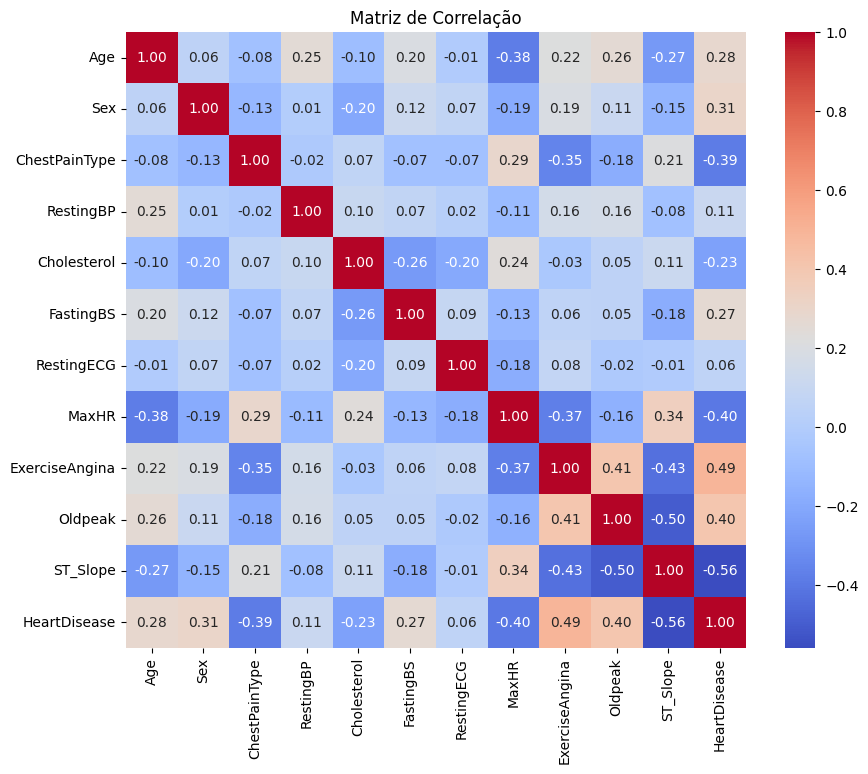

In [ ]:
plt.figure(figsize=(10,8))
correlation_matrix = base.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
# Calcular a correlação entre variáveis numéricas
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

#**ANÁLISE EXPLORATÓRIA**

##**Gênero**

###**Insights**

79% dos registros são de pessoas do gênero masculino.
21% apenas é de pessoas do gênero feminino.

Apresenta um desbalanceamento de classe quanto aos gêneros.

###**Code:**

In [ ]:
base['Sex'].value_counts()

,count
Sex,
M,725
F,193


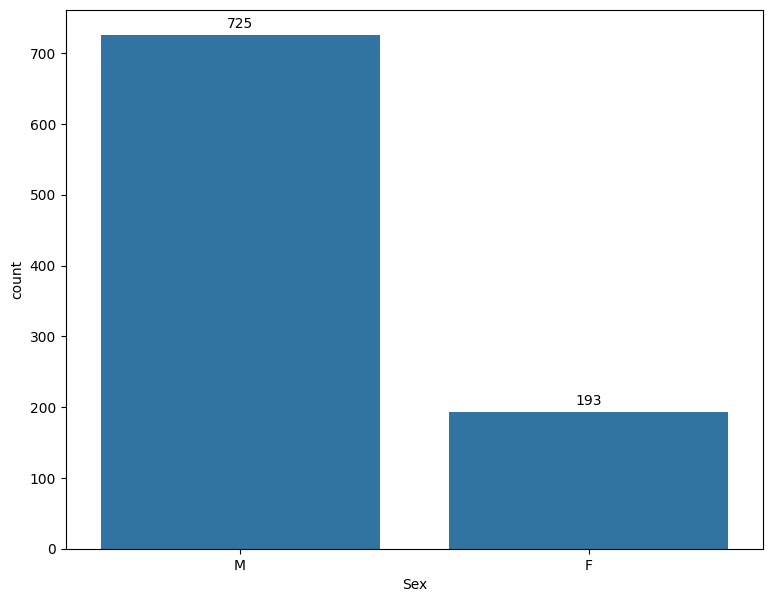

In [ ]:
plt.figure(figsize=(9,7))
ax = sns.countplot(x='Sex', data=base)
for container in ax.containers:
  ax.bar_label(container, label_type= 'edge', padding=3)
plt.show()

#79% ds registros é do sexo masculino

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(
            x='Importance',
            y='Feature',
            data=feature_importances,
            palette = 'viridis'
            )
plt.title('Importância das variáveis')
plt.xlabel('Importância')
plt.ylabel('Variáveis')

# Adicionar rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

##**Idades**

###**Insights**
- As idades apresentam uma distribuição normal;
- Tem um intervalor interquartil de 28 a 77 anos;
- A mediana das idades é de 54 anos;
- 25% das pessoas possuem até 47 anos;
- 75% das pessoas até 60 anos;


###**Code:**

In [ ]:
base.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<Axes: xlabel='Age', ylabel='Count'>

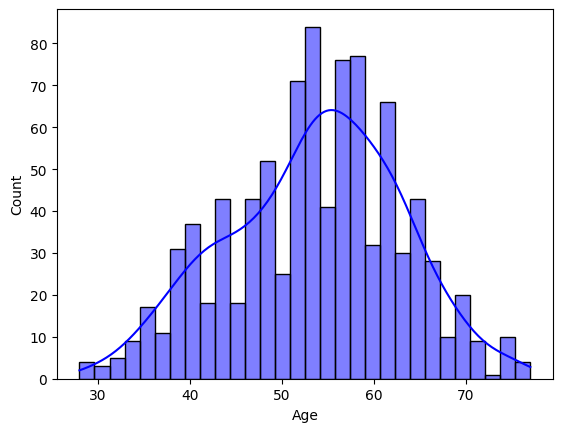

In [ ]:
sns.histplot(base, x='Age', bins=30, color="blue", kde=True, stat="count")

In [ ]:
fig_age = px.box(base, y="Age", title="Distribuição das idades")
fig_age.show()

<Axes: title={'center': 'Distribuição por idade e genêro'}, xlabel='Age', ylabel='count'>

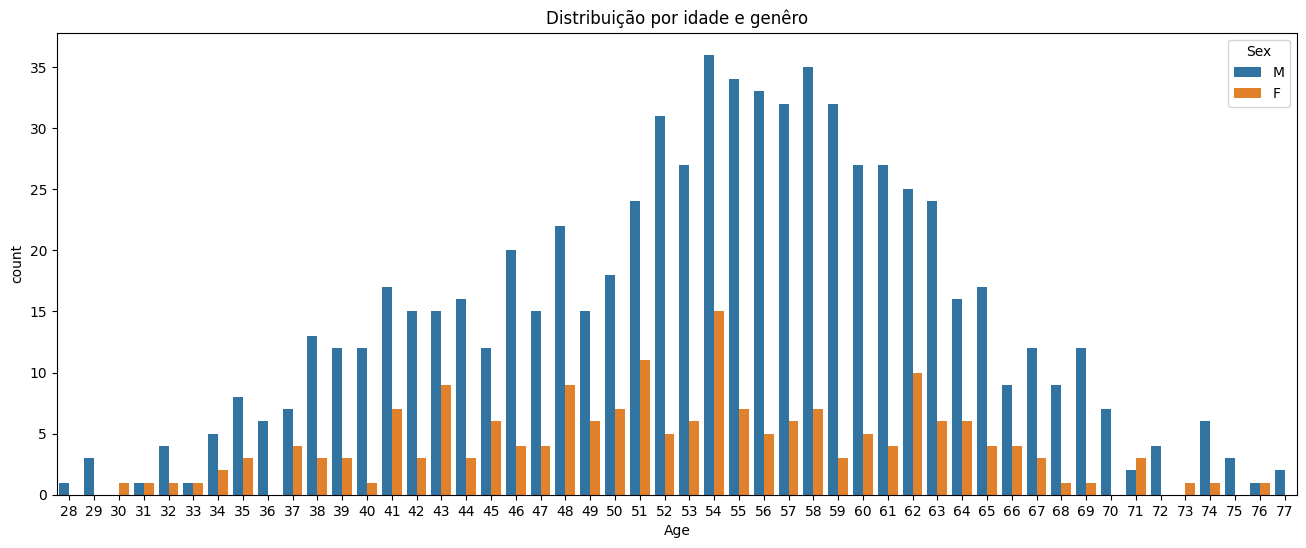

In [ ]:
plt.figure(figsize = (16,6))
plt.title('Distribuição por idade e genêro')
sns.countplot(data=base, x='Age', hue='Sex')

##**Tipo de dor no peito**

###**Insights**

54% dos casos são assintomático e 22% dos casos são de dor não anginosa, ou seja 76 pessoas em cada 100 não tiveram sintomas relacionados com o sistema cardiovascular.

###**Code**

In [ ]:
base['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


In [ ]:
chest_pain_stats = base['ChestPainType'].value_counts().reset_index()
chest_pain_stats.columns = ['Tipo de dor no peito', 'Freq.Absoluta']
chest_pain_stats['Percentual'] = (chest_pain_stats['Freq.Absoluta'] / chest_pain_stats['Freq.Absoluta'].sum()) * 100
print(chest_pain_stats)

  Tipo de dor no peito  Freq.Absoluta  Percentual
0                  ASY            496   54.030501
1                  NAP            203   22.113290
2                  ATA            173   18.845316
3                   TA             46    5.010893


<ipython-input-27-b92604bfe7da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


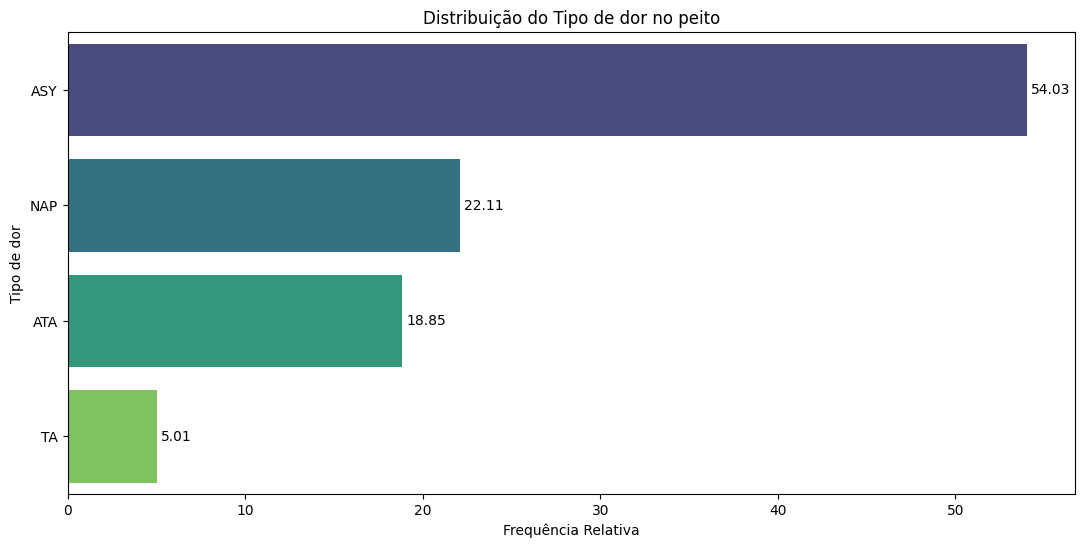

In [ ]:
plt.figure(figsize=(13,6))
ax = sns.barplot(
            x='Percentual',
            y='Tipo de dor no peito',
            data=chest_pain_stats,
            palette = 'viridis'
            )
plt.title('Distribuição do Tipo de dor no peito')
plt.xlabel('Frequência Relativa')
plt.ylabel('Tipo de dor')

# Adicionar rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.show()

##**Resting BP**: Pressão sanguínea em repouso (mmHg)

A pressão arterial em repouso é **considerada normal quando está abaixo de 120 por 70 milímetros de mercúrio (mmHg)**. Valores entre 120 por 70 mmHg e 139 por 89 mmHg são considerados elevados, e acima de 140 por 90 mmHg são considerados hipertensão.

A patologia é diagnosticada quando os valores das pressões máxima e mínima são iguais ou ultrapassam os 140/90 mmHg. De acordo com a Sociedade Europeia de Cardiologia a pressão ideal passa a ser de 120/70 mmHg, a partir de 120/80mmHg já é considerada pressão elevada, conforme publicado no European Heart Journal.

A base só apresenta os dados da pressão arterial sistólica (PAS). A PAS é o valor mais alto da pressão arterial, medido em milímetros de mercúrio (mmHg). Não apresenta portanto, os dados da pressão diastólica.

A pressão arterial é medida com um esfigmomanômetro.

###**Insights**

⚠️ Investigar casos onde a pressão é de 0, 80, 180 e 200.
Avaliar se faz sentido e tratar na limpeza dos dados.
- Provavelmente é ruído, causado por erro de digitação

###**Code**

In [ ]:
base['RestingBP'].value_counts()

,count
RestingBP,
120,132
130,118
140,107
110,58
150,55
...,...
185,1
98,1
92,1


In [ ]:
fig_restbp = px.box(base, y='RestingBP', title='Dist. RestBP')
fig_restbp.show()

## **Fasting BS:** açúcar no sangue em jejum (mg/dl)

###**Insights**

76.68% dos casos é não diabético

###**Code**

In [ ]:
base['FastingBS'].value_counts()

,count
FastingBS,
0,704
1,214


In [ ]:
blood_sugar_stats = base['FastingBS'].value_counts().reset_index()
blood_sugar_stats.columns = ['Açucar no sangue', 'Freq.Absoluta']
blood_sugar_stats['Freq.Relativa'] = (
    blood_sugar_stats['Freq.Absoluta'] /
    blood_sugar_stats['Freq.Absoluta'].sum()
    ) * 100

In [ ]:
print(blood_sugar_stats)

   Açucar no sangue  Freq.Absoluta  Freq.Relativa
0                 0            704      76.688453
1                 1            214      23.311547


- 0: Fasting BS: não diabético
- 1: Fasting BS: diabético

## **RestingECG:**
Eletrocardiograma em repouso
   - 0: Normal.
   - 1: ST - Anormalidade da onda ST-T.
   - 2: LVH - Hipertrofia ventricular esquerda.

###**Insights**

60% do eletrocardiograma em repouso é normal.
Somente 20% apresenta anormalidade no onda ST-T
e 19% apresenta a hipertrofia ventricular



###**Code**

In [ ]:
base['RestingECG'].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


In [ ]:
resting_ecg_stats = base['RestingECG'].value_counts().reset_index()
resting_ecg_stats.columns = ['Results Eletro', 'Freq.Absoluta']
resting_ecg_stats['Freq.Relativa'] = (resting_ecg_stats['Freq.Absoluta']
                                      / resting_ecg_stats['Freq.Absoluta'].sum())*100
print(resting_ecg_stats)

  Results Eletro  Freq.Absoluta  Freq.Relativa
0         Normal            552      60.130719
1            LVH            188      20.479303
2             ST            178      19.389978


## **Cholesterol:**



Colesterol sérico (mg/dl) é um tipo de gordura que tem funções no organismo, desde a produção de certos hormônios até a formação das membranas celulares.

O colesterol alto está associado a um maior risco de problemas cardiovasculares.

- Colesterol total:

**Valores abaixo de 190 mg/dL são considerados ideais.** Níveis entre 200 e 239 mg/dL são limítrofes e acima de 240 mg/dL são elevados.


Os resultados do exame de colesterol total são expressos em miligramas por decilitro de sangue (mg/dL).

###**Insights**

⚠️ 172 registros de colesterol zerado - Isso não faz sentido. Precisa tratar;

- Avaliar se o colesterol acima de 407 fazem sentido, como por exemplo o 613.

In [ ]:
base.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


###**Code**

In [ ]:
base['Cholesterol'].value_counts()

,count
Cholesterol,
0,172
254,11
223,10
220,10
230,9
...,...
392,1
316,1
153,1


In [ ]:
fig_cholesterol = px.box(base, y='Cholesterol', title='Dist.Cholesterol')
fig_cholesterol.show()

In [ ]:
fig_restbp = px.box(base, y='RestingBP', title='Dist. RestBP')
fig_restbp.show()

## **MaxHR:**



Max HR: Frequência cardíaca máxima.

É a maior frequência cardíaca que um indivíduo pode atingir durante o esforço.

Para calcular a FCmax, pode-se usar a fórmula (220 - idade) para homens e (226 - idade) para mulheres.

O coração tem dois movimentos: a diástole (quando o órgão se enche de sangue) e a sístole (quando o sangue é bombeado para o corpo). Quando o coração acelera, ele encurta a diástole.

Aqui o MaxHR é expresso em batimentos por minuto (bpm)

Quando os BPMs estão fora dos índices regulares, dizemos que a pessoa tem uma arritmia cardíaca

Para atletas um valor de até 188 bpm é normal e considerado saudáveo, aponta estudo realizado por pesquisadores brasileiros e publicado esta semana no periódico científico “International Journal of Cardiology”.

Mas em repouso é importante observar casos acima de 120bpm

###**Insights**

A mediana é de 138BPM, sendo o Q3 de 156bpm.

###**Code**

In [ ]:
base['MaxHR'].value_counts()

,count
MaxHR,
150,43
140,41
120,36
130,33
160,25
...,...
63,1
83,1
60,1


In [ ]:
fig_maxhr = px.box(base, y='MaxHR', title='Dist.Max Freq Cardiaca')
fig_maxhr.show()

##**Exercice Angina**

###**Insights**

59% dos casos a angina não foi induzida por exercício

###**Code**

In [ ]:
base['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
N,547
Y,371


##**Oldpeak**

Depressão de ST induzida por exercício em relação ao repouso.

A depressão do segmento ST é uma alteração que pode indicar problemas cardiovasculares. A depressão é considerada significativa quando a diferença é maior ou igual a 1 mm

###**Insights**

- Vimos que em 40% dos casos a depressão do segmento ST é nula - igual a linha de base;

- 50% dos casos é abaixo de 0.6m, portanto normal.
- 75% dos casos tem até 1.5mm, que apresenta uma diferança que vale a pena considerar.
- 25% apresentaram valores acima de 1.5mm, chegando até 3.7 de limite máximo, com alguns outliers de 6.2mm



###**Code**

In [ ]:
base['Oldpeak'].value_counts()

,count
Oldpeak,
0.0,368
1.0,86
2.0,76
1.5,53
3.0,28
1.2,26
0.2,22
0.5,19
1.4,18


In [ ]:
fig_oldpeak = px.box(base, y='Oldpeak', title='Boxplot Oldpeak')
fig_oldpeak.show()

##**ST Slope**

Inclinação do segmento ST



Representa a fase de repolarização ventricular. Se as artérias coronárias estiverem obstruídas, o coração pode não receber oxigênio suficiente, causando alterações no segmento ST que é um indicador de isquemia coronária.

A inclinação pode ser:

UP - Segmento ST elevado, pode indicar repolarização precoce (ST Supra) em algumas situações.

Flat - Segmento ST plano em relação a linha da base,geralmente considerado normal.

2: Down - Segmento ST abaixo na linha da base - ST Infra. Forte indicador de isquemia coronária.

Dados extraídos do Eletrocardiograma.

###**Insights**

Apenas 7% aproximadamente apresentaram casos de ST Infra.
ST Supra é o mais comum com 43% dos casos.

No entanto, 50% não apresentaram alteração no Segmento ST

###**Code**

In [ ]:
base['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


In [ ]:
st_slope_stats = base['ST_Slope'].value_counts().reset_index()
st_slope_stats.columns = ['ST Slope',  'Freq.Abs']
st_slope_stats['Freq.Relativa'] = (
    st_slope_stats['Freq.Abs'] / st_slope_stats['Freq.Abs'].sum()
) * 100

In [ ]:
st_slope_stats

,ST Slope,Freq.Abs,Freq.Relativa
0,Flat,460,50.108932
1,Up,395,43.028322
2,Down,63,6.862745


##**Heart Disease**

Variável Alvo

###**Insights**

A classe alvo apresenta um leve desbalanceamento, uma diferença de 10.68% entre as classes.

Podemos considerar como uma variável balanceada, mas durante a avaliação do modelo é importante se atentar a alguns pontos devido a sensibilidade do contexto clinico.

- Vale considerar usar Random Forest e XGBoost por serem robustos a desbalanceamento.

⚠️ Durante avaliação do modelo, deve-se monitorar se  modelo está priorizando corretamente a classe minoritária. Analisar métrica:
- AUC-ROC
- Precision-Recall
- F1-Score

###**Code**

In [ ]:
st_target_stats = base['HeartDisease'].value_counts().reset_index()
st_target_stats.columns = ['Target',  'Freq.Abs']
st_target_stats['Freq.Relativa'] = (
    st_target_stats['Freq.Abs'] / st_slope_stats['Freq.Abs'].sum()
) * 100

In [ ]:
st_target_stats

,Target,Freq.Abs,Freq.Relativa
0,1,508,55.337691
1,0,410,44.662309


from matplotlib import pyplot as plt
st_target_stats['Target'].plot(kind='hist', bins=20, title='Target')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
st_target_stats['Freq.Abs'].plot(kind='hist', bins=20, title='Freq.Abs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
st_target_stats['Freq.Relativa'].plot(kind='hist', bins=20, title='Freq.Relativa')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
st_target_stats.plot(kind='scatter', x='Target', y='Freq.Abs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
st_target_stats.plot(kind='scatter', x='Freq.Abs', y='Freq.Relativa', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
st_target_stats['Target'].plot(kind='line', figsize=(8, 4), title='Target')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
st_target_stats['Freq.Abs'].plot(kind='line', figsize=(8, 4), title='Freq.Abs')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
st_target_stats['Freq.Relativa'].plot(kind='line', figsize=(8, 4), title='Freq.Relativa')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
st_target_stats['Target'] = st_target_stats['Target'].astype(str)

<ipython-input-23-2e6505d41bb9>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




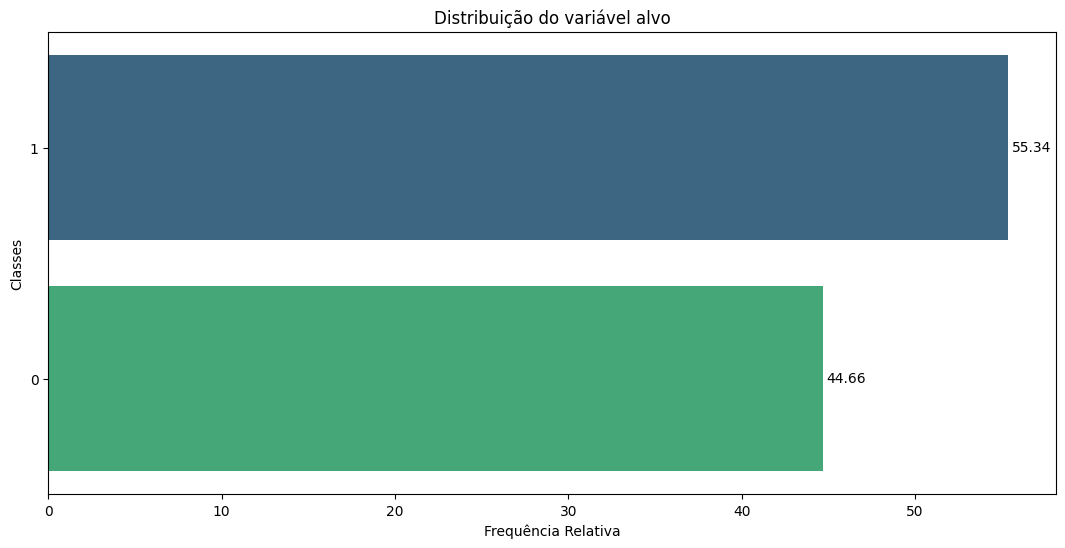

In [ ]:
plt.figure(figsize=(13,6))
ax = sns.barplot(
            x='Freq.Relativa',
            y='Target',
            data=st_target_stats,
            palette = 'viridis'
            )
plt.title('Distribuição do variável alvo')
plt.xlabel('Frequência Relativa')
plt.ylabel('Classes')

# Adicionar rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.show()


Heart Disease: Doença cardíaca
0: Não possui doença cardíaca.
1: Possui doença cardíaca.

#Etapas

Próximas etapas:

4.   Limpeza dos dados (Valores nulos, ruídos)
5.   Análise estatística descritiva e exploratória dos dados
6.   Análise de outliers
7.   Transformação dos dados.
8.   Criação do modelo
9.   Avaliação do modelo
10.   Explicabilidade do modelo
11.  Deploy

